In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Function toplot a distribution
def plot_distribution(dict_val, title, x_label, y_label):
    N = sum(dict_val.values())
    x_values = list(dict_val.keys())
    y_values = [y / N for y in list(dict_val.values())]
    plt.figure(figsize=(15, 6))
    plt.bar(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xlim(min(x_values), max(x_values))
    plt.ylim(0, max(y_values) * 1.05)
    plt.show()

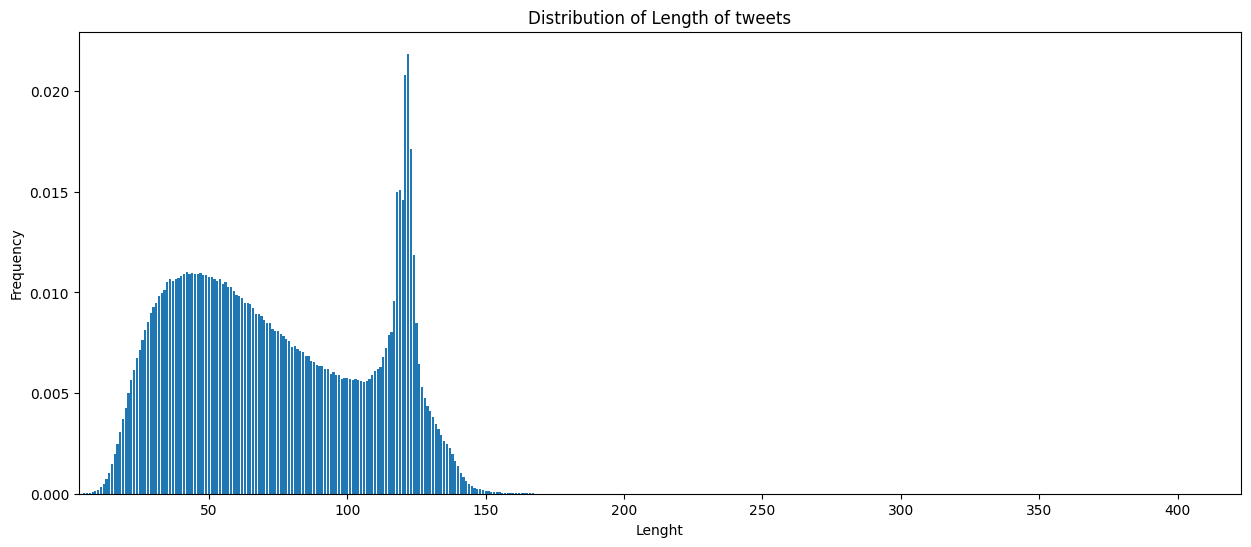

In [3]:
# Plot distribution of length of tweets
PATH_DATA = "../data/datasets/twitter.json"
data = pd.read_json(PATH_DATA, lines=True)

dict_length = {}
for row in data.itertuples():
    length = len(row.text)
    if length not in dict_length.keys():
        dict_length[length] = 1
    else:
        dict_length[length] += 1
        
plot_distribution(dict_length, "Distribution of Length of tweets", "Lenght", "Frequency")

In [4]:
# Evaluate and compare predictions of models on test set of 10k samples 
df_labels = pd.read_csv("test_analysis_labels.csv")
df_text = pd.read_json("test_analysis.json", lines=True)

misses = []
dict_distributions = {}

for filename in sorted(os.listdir("../predictions")):
    if ".git" in filename:
        pass
    else:
        file_path = os.path.join("../predictions", filename)
        df_pred = pd.read_csv(file_path)
        misses_mod = []
        lens = []
        dict_d = {}
        for row in df_pred.iterrows():
            label = 0 if row[1].Prediction == -1 else 1
            if df_labels.iloc[row[0], 0] != label:
                misses_mod.append(row[0])
                lens.append(len(df_text.loc[row[0], "text"]))
                length = len(df_text.loc[row[0], "text"])
                if length not in dict_d.keys():
                    dict_d[length] = 1
                else:
                    dict_d[length] += 1   
        
        dict_distributions[filename] = dict_d
        print(sum(lens) / len(lens))
        misses.append(misses_mod)

68.94701986754967
69.995115995116
69.74409937888198
72.52734693877551


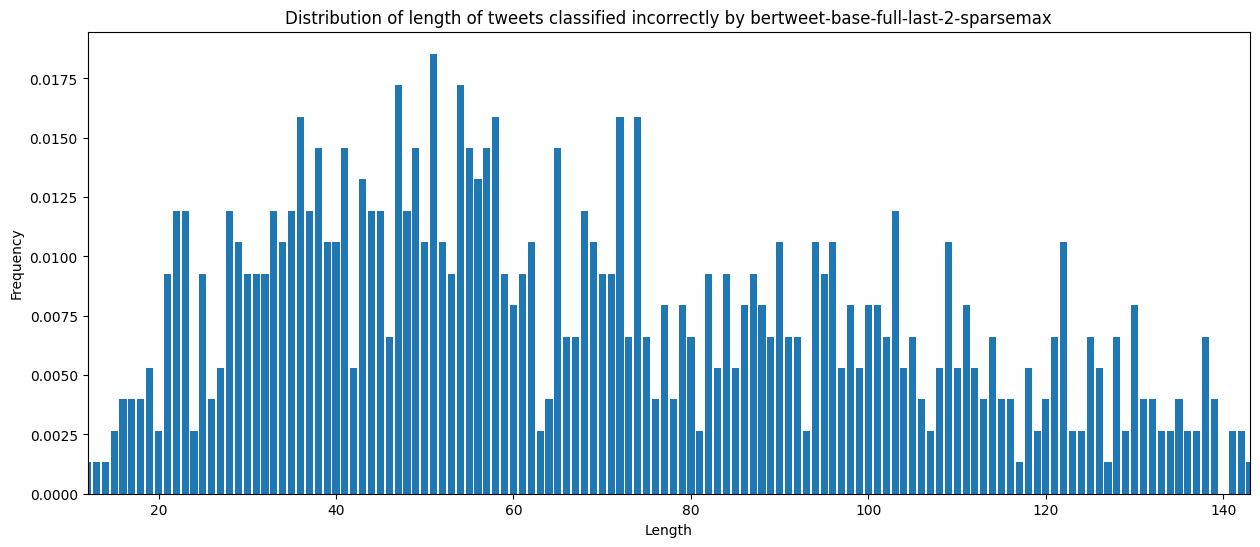

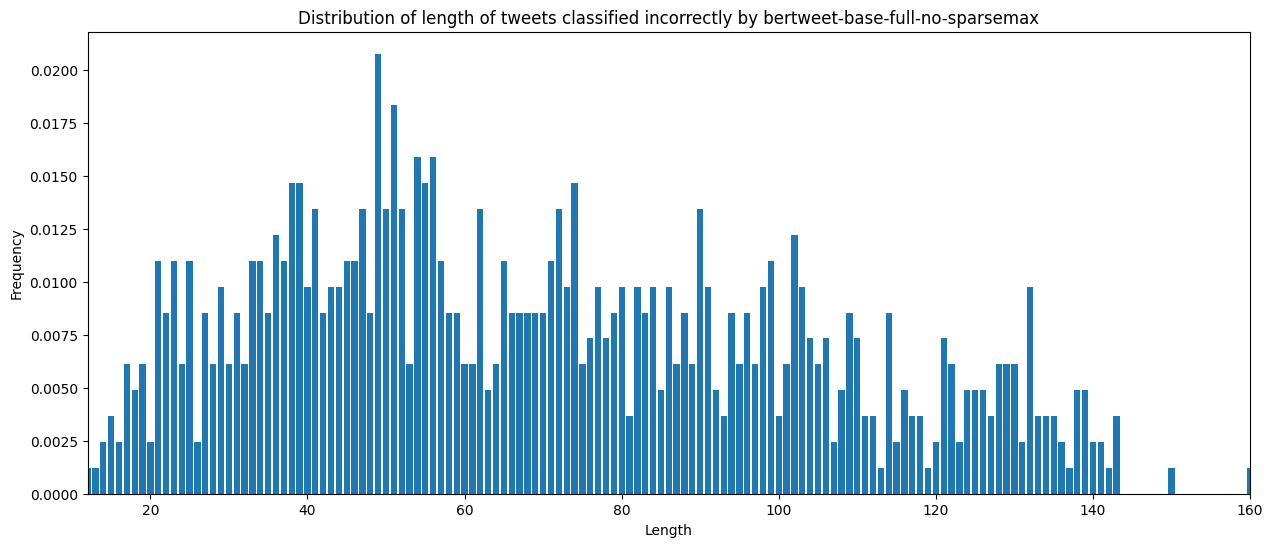

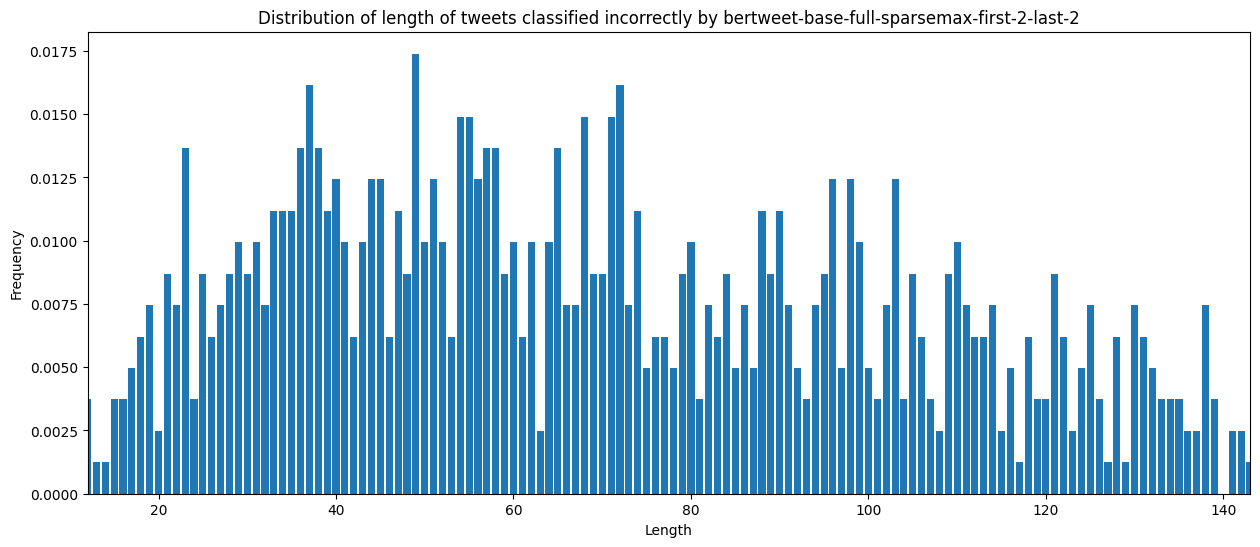

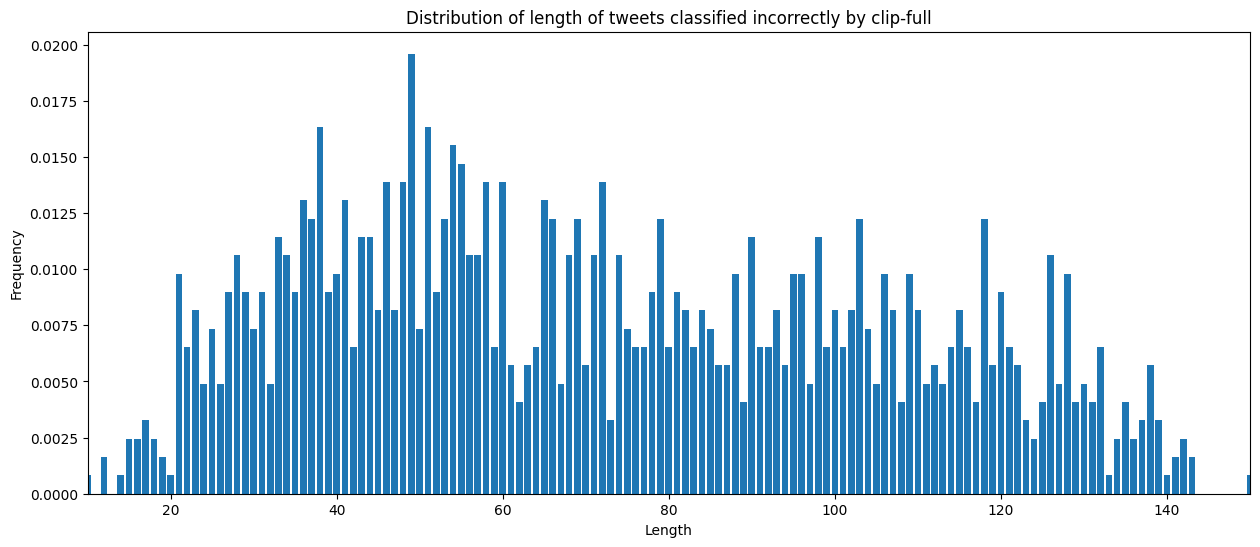

In [5]:
for key, d in dict_distributions.items():
    plot_distribution(d, f"Distribution of length of tweets classified incorrectly by {key.replace('.csv', '')}", "Length", "Frequency")

In [6]:
# Save elements which have been mistakenly classified by models used in the ensamble
common_elements = [element for element in misses[0] if element in misses[1] if element in misses[3]]
df_misses = df_text.iloc[common_elements]
df_misses_labels = df_labels.iloc[common_elements]
pd.concat([df_misses_labels, df_misses], axis=1).to_csv("common-with-clip.csv")